In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/iris.csv')
df.head()

,sepallen,sepalwid,petallen,petalwid,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
x=df.iloc[:,0:4]
y=df.iloc[:,-1]
x[:10]

,sepallen,sepalwid,petallen,petalwid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
y[:10]

,label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
x.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
norm_x = scaler.transform(x)
x_train,x_test,y_train,y_test=train_test_split(norm_x,y,test_size=0.20,random_state=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [ ]:
y_train[:10]

,label
58,1
97,1
129,2
114,2
146,2
47,0
124,2
120,2
118,2
141,2


In [ ]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

y_train[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(120, 4)
(120, 3)


In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851 (3.32 KB)

 Trainable params: 851 (3.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=10,epochs=500)

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3856 - loss: 1.1038 - val_accuracy: 0.3333 - val_loss: 1.0792
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4174 - loss: 1.0865 - val_accuracy: 0.3667 - val_loss: 1.0675
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3526 - loss: 1.0696 - val_accuracy: 0.5000 - val_loss: 1.0562
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4000 - loss: 1.0715 - val_accuracy: 0.6333 - val_loss: 1.0464
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5312 - loss: 1.0458 - val_accuracy: 0.6000 - val_loss: 1.0319
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4630 - loss: 1.0491 - val_accuracy: 0.6000 - val_loss: 1.0167
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5482 - loss: 0.9907 - val_accuracy: 0.5667 - val_loss: 0.9986
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5207 - loss: 1.0160 - val_accuracy: 0.5667 - 

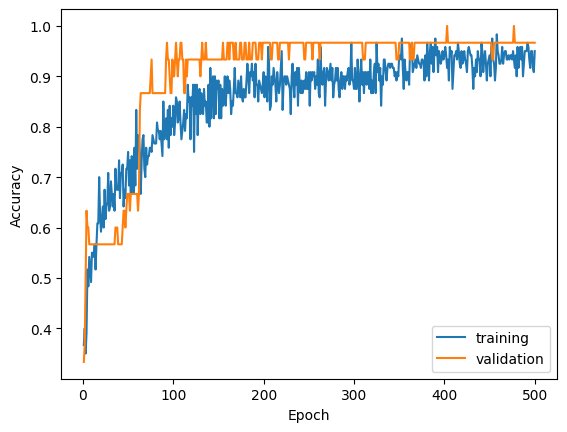

In [ ]:
loss=history.history['loss']
epoch=range(1,len(loss)+1)
plt.plot(epoch,history.history['accuracy'],label='training')
plt.plot(epoch,history.history['val_accuracy'],label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

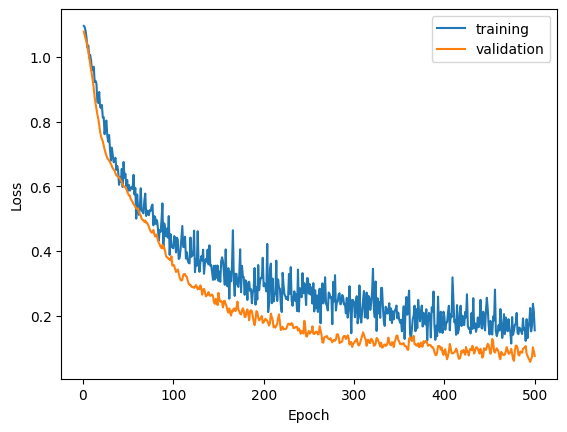

In [ ]:
plt.plot(epoch,history.history['loss'],label='training')
plt.plot(epoch,history.history['val_loss'],label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('total loss',score[0])
print('test accuracy',score[1])

total loss 0.0757882297039032
test accuracy 0.9666666388511658


In [ ]:
score

[0.0757882297039032, 0.9666666388511658]

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
pred=np.argmax(y_pred,axis=1)[:50]
label=np.argmax(y_test,axis=1)[:50]
print("Label of the first 5  prediction ",pred)
print("label of the first 5  original ",label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Label of the first 5  prediction  [1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]
label of the first 5  original  [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


In [ ]:
y_testnew=np.argmax(y_test,axis=1)
y_prednew=np.argmax(y_pred,axis=1)
cf_matrix = confusion_matrix(y_testnew,y_prednew)
cf_matrix

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]])

<Axes: >

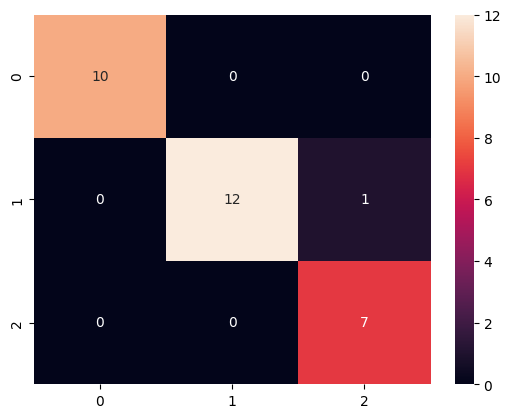

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)